In [60]:
import pandas as pd
import numpy as np
import datetime as dt

# Extraction

In [61]:
original_df = pd.read_csv('California_Fire_Incidents.csv')
original_df.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [62]:
original_df.columns

Index(['AcresBurned', 'Active', 'AdminUnit', 'AirTankers', 'ArchiveYear',
       'CalFireIncident', 'CanonicalUrl', 'ConditionStatement',
       'ControlStatement', 'Counties', 'CountyIds', 'CrewsInvolved', 'Dozers',
       'Engines', 'Extinguished', 'Fatalities', 'Featured', 'Final',
       'FuelType', 'Helicopters', 'Injuries', 'Latitude', 'Location',
       'Longitude', 'MajorIncident', 'Name', 'PercentContained',
       'PersonnelInvolved', 'Public', 'SearchDescription', 'SearchKeywords',
       'Started', 'Status', 'StructuresDamaged', 'StructuresDestroyed',
       'StructuresEvacuated', 'StructuresThreatened', 'UniqueId', 'Updated',
       'WaterTenders'],
      dtype='object')

In [63]:
original_df.describe()

,AcresBurned,AirTankers,ArchiveYear,CrewsInvolved,Dozers,Engines,Fatalities,Helicopters,Injuries,Latitude,Longitude,PercentContained,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,WaterTenders
count,1633.000000,28.000000,1636.000000,171.000000,123.000000,191.000000,21.000000,84.000000,120.000000,1636.000000,1636.000000,1633.0,204.000000,67.000000,175.000000,0.0,30.000000,146.000000
mean,4589.443968,4.071429,2016.608802,11.561404,7.585366,23.565445,8.619048,5.357143,3.500000,37.203975,-108.082642,100.0,328.553922,67.970149,271.788571,NaN,522.800000,7.815068
std,27266.337722,6.399818,1.845340,14.455633,14.028616,41.004424,18.529642,7.265437,3.806231,135.401380,37.006927,0.0,521.138789,155.771975,1557.255963,NaN,739.586856,12.719251
min,0.000000,0.000000,2013.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-120.258000,-124.196290,100.0,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,35.000000,2.000000,2015.000000,2.500000,1.000000,5.000000,1.000000,1.000000,1.000000,34.165890,-121.768358,100.0,55.000000,1.000000,1.000000,NaN,0.000000,2.000000
50%,100.000000,2.000000,2017.000000,6.000000,2.000000,11.000000,3.000000,2.000000,3.000000,37.104065,-120.461560,100.0,151.500000,6.000000,7.000000,NaN,45.000000,4.000000
75%,422.000000,4.000000,2018.000000,13.500000,5.000000,24.000000,6.000000,5.000000,4.000000,39.086808,-117.474072,100.0,350.000000,49.500000,41.500000,NaN,1043.750000,6.000000
max,410203.000000,27.000000,2019.000000,82.000000,76.000000,256.000000,85.000000,29.000000,26.000000,5487.000000,118.908200,100.0,3100.000000,783.000000,18804.000000,NaN,2600.000000,79.000000


In [64]:
original_df.Started

0       2013-08-17T15:25:00Z
1       2013-05-30T15:28:00Z
2       2013-07-15T13:43:00Z
3       2013-08-10T16:30:00Z
4       2013-05-02T07:01:00Z
                ...         
1631    2019-10-10T12:08:00Z
1632    2019-06-28T15:03:04Z
1633    2019-11-25T12:02:02Z
1634    2019-10-22T19:20:44Z
1635    2019-10-14T15:32:20Z
Name: Started, Length: 1636, dtype: object

In [65]:
#Break out 'Started' Column into months

start = pd.DatetimeIndex(original_df['Started']);
original_df['Started Month'] = start.month
original_df

#groupedFire = fireNew.groupby(by=['ArchiveYear','Month'] ,as_index=False).agg({'AcresBurned': "sum",'Active':'count'})
#groupedFire['Count'] = groupedFire.Active
#caGroupedFire = groupedFire[['ArchiveYear','Month','AcresBurned','Count']]
#caGroupedFire.head(6)


,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,Started Month
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN,8
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN,5
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN,7
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN,8
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,9.0,False,CAL FIRE / Riverside County Fire,NaN,2019,True,/incidents/2019/10/10/eagle-fire/,NaN,NaN,Riverside,...,2019-10-10T12:08:00Z,Finalized,NaN,NaN,NaN,NaN,6e93b252-99a3-4214-9921-238373b17535,2019-10-10T18:11:59.733Z,NaN,10
1632,2.0,False,CAL FIRE Nevada-Yuba-Placer Unit,NaN,2019,True,/incidents/2019/6/28/long-fire/,NaN,NaN,Nevada,...,2019-06-28T15:03:04Z,Finalized,NaN,NaN,NaN,NaN,b38c0563-b321-431b-9174-6336c5a0d449,2019-06-30T15:52:01.023Z,NaN,6
1633,NaN,False,Yolo County Fire Protection District,NaN,2019,False,/incidents/2019/11/25/cashe-fire/,NaN,NaN,Yolo,...,2019-11-25T12:02:02Z,Finalized,NaN,NaN,NaN,NaN,9c26f915-1b33-422d-b30a-9eb4da6fd729,2019-12-03T16:35:20.93Z,NaN,11
1634,NaN,False,Camp Pendleton Marine Corps Base,NaN,2019,False,/incidents/2019/10/22/oak-fire/,NaN,NaN,San Diego,...,2019-10-22T19:20:44Z,Finalized,NaN,NaN,NaN,NaN,7264a106-e0f4-41de-8fd0-3f9110431e28,2019-11-21T12:21:28.58Z,NaN,10


In [66]:
#Break out 'Extinguished' Column into months

end = pd.DatetimeIndex(original_df['Extinguished']);
original_df['End Month'] = end.month
original_df

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,Started Month,End Month
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN,8,9.0
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN,5,6.0
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN,7,7.0
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN,8,8.0
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,9.0,False,CAL FIRE / Riverside County Fire,NaN,2019,True,/incidents/2019/10/10/eagle-fire/,NaN,NaN,Riverside,...,Finalized,NaN,NaN,NaN,NaN,6e93b252-99a3-4214-9921-238373b17535,2019-10-10T18:11:59.733Z,NaN,10,10.0
1632,2.0,False,CAL FIRE Nevada-Yuba-Placer Unit,NaN,2019,True,/incidents/2019/6/28/long-fire/,NaN,NaN,Nevada,...,Finalized,NaN,NaN,NaN,NaN,b38c0563-b321-431b-9174-6336c5a0d449,2019-06-30T15:52:01.023Z,NaN,6,6.0
1633,NaN,False,Yolo County Fire Protection District,NaN,2019,False,/incidents/2019/11/25/cashe-fire/,NaN,NaN,Yolo,...,Finalized,NaN,NaN,NaN,NaN,9c26f915-1b33-422d-b30a-9eb4da6fd729,2019-12-03T16:35:20.93Z,NaN,11,NaN
1634,NaN,False,Camp Pendleton Marine Corps Base,NaN,2019,False,/incidents/2019/10/22/oak-fire/,NaN,NaN,San Diego,...,Finalized,NaN,NaN,NaN,NaN,7264a106-e0f4-41de-8fd0-3f9110431e28,2019-11-21T12:21:28.58Z,NaN,10,NaN


In [67]:
#limit columns to only columns we want to analyze

project_df = original_df[['Active','Name','AcresBurned','Latitude', 'Longitude', 'Location','Counties','Started','Extinguished', 'Started Month']]
project_df

,Active,Name,AcresBurned,Latitude,Longitude,Location,Counties,Started,Extinguished,Started Month
0,False,Rim Fire,257314.0,37.857000,-120.086000,3 miles east of Groveland along Hwy 120,Tuolumne,2013-08-17T15:25:00Z,2013-09-06T18:30:00Z,8
1,False,Powerhouse Fire,30274.0,34.585595,-118.423176,Angeles National Forest,Los Angeles,2013-05-30T15:28:00Z,2013-06-08T18:30:00Z,5
2,False,Mountain Fire,27531.0,33.709500,-116.728850,Hwy 243 & Hwy 74 near Mountain Center,Riverside,2013-07-15T13:43:00Z,2013-07-30T18:00:00Z,7
3,False,American Fire,27440.0,39.120000,-120.650000,"Deadwood Ridge, northeast of Foresthill",Placer,2013-08-10T16:30:00Z,2013-08-30T08:00:00Z,8
4,False,Springs Fire,24251.0,0.000000,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,Ventura,2013-05-02T07:01:00Z,2013-05-11T06:30:00Z,5
...,...,...,...,...,...,...,...,...,...,...
1631,False,Eagle Fire,9.0,33.827979,-117.499619,"Eagle Canyon Rd. and Cajalco Rd., southwest of...",Riverside,2019-10-10T12:08:00Z,2019-10-10T18:11:00Z,10
1632,False,Long Fire,2.0,39.409722,-121.000556,"Off of Long Point Road and Old Mill Road, Sou...",Nevada,2019-06-28T15:03:04Z,2019-06-28T17:33:00Z,6
1633,False,Cashe Fire,NaN,38.734634,-121.729691,"County Road 102 and County Road 17, North of W...",Yolo,2019-11-25T12:02:02Z,NaN,11
1634,False,Oak Fire,NaN,33.351145,-117.403719,"Near Basilone Road and Las Pulgas Road, near C...",San Diego,2019-10-22T19:20:44Z,NaN,10


In [68]:
#Choose Columns for Machine Learning Model

predictive_df = original_df[['Name','AcresBurned','Latitude', 'Longitude', 'Location','Counties','Started','Extinguished']]

In [69]:
#Seperate out Started Column

project_df.Started = pd.to_datetime(project_df.Started)
project_df.Extinguished = pd.to_datetime(project_df.Extinguished)


C:\Users\msmas\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [70]:
project_df.head()

,Active,Name,AcresBurned,Latitude,Longitude,Location,Counties,Started,Extinguished,Started Month
0,False,Rim Fire,257314.0,37.857000,-120.086000,3 miles east of Groveland along Hwy 120,Tuolumne,2013-08-17 15:25:00+00:00,2013-09-06 18:30:00+00:00,8
1,False,Powerhouse Fire,30274.0,34.585595,-118.423176,Angeles National Forest,Los Angeles,2013-05-30 15:28:00+00:00,2013-06-08 18:30:00+00:00,5
2,False,Mountain Fire,27531.0,33.709500,-116.728850,Hwy 243 & Hwy 74 near Mountain Center,Riverside,2013-07-15 13:43:00+00:00,2013-07-30 18:00:00+00:00,7
3,False,American Fire,27440.0,39.120000,-120.650000,"Deadwood Ridge, northeast of Foresthill",Placer,2013-08-10 16:30:00+00:00,2013-08-30 08:00:00+00:00,8
4,False,Springs Fire,24251.0,0.000000,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,Ventura,2013-05-02 07:01:00+00:00,2013-05-11 06:30:00+00:00,5


In [71]:
project_df['Burn Length']=project_df['Extinguished']-project_df['Started']

C:\Users\msmas\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
import numpy as np
project_df['Burn Length(h)']=project_df['Burn Length']/ np.timedelta64(1, 'h')

C:\Users\msmas\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
project_df

,Active,Name,AcresBurned,Latitude,Longitude,Location,Counties,Started,Extinguished,Started Month,Burn Length,Burn Length(h)
0,False,Rim Fire,257314.0,37.857000,-120.086000,3 miles east of Groveland along Hwy 120,Tuolumne,2013-08-17 15:25:00+00:00,2013-09-06 18:30:00+00:00,8,20 days 03:05:00,483.083333
1,False,Powerhouse Fire,30274.0,34.585595,-118.423176,Angeles National Forest,Los Angeles,2013-05-30 15:28:00+00:00,2013-06-08 18:30:00+00:00,5,9 days 03:02:00,219.033333
2,False,Mountain Fire,27531.0,33.709500,-116.728850,Hwy 243 & Hwy 74 near Mountain Center,Riverside,2013-07-15 13:43:00+00:00,2013-07-30 18:00:00+00:00,7,15 days 04:17:00,364.283333
3,False,American Fire,27440.0,39.120000,-120.650000,"Deadwood Ridge, northeast of Foresthill",Placer,2013-08-10 16:30:00+00:00,2013-08-30 08:00:00+00:00,8,19 days 15:30:00,471.500000
4,False,Springs Fire,24251.0,0.000000,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,Ventura,2013-05-02 07:01:00+00:00,2013-05-11 06:30:00+00:00,5,8 days 23:29:00,215.483333
...,...,...,...,...,...,...,...,...,...,...,...,...
1631,False,Eagle Fire,9.0,33.827979,-117.499619,"Eagle Canyon Rd. and Cajalco Rd., southwest of...",Riverside,2019-10-10 12:08:00+00:00,2019-10-10 18:11:00+00:00,10,0 days 06:03:00,6.050000
1632,False,Long Fire,2.0,39.409722,-121.000556,"Off of Long Point Road and Old Mill Road, Sou...",Nevada,2019-06-28 15:03:04+00:00,2019-06-28 17:33:00+00:00,6,0 days 02:29:56,2.498889
1633,False,Cashe Fire,NaN,38.734634,-121.729691,"County Road 102 and County Road 17, North of W...",Yolo,2019-11-25 12:02:02+00:00,NaT,11,NaT,NaN
1634,False,Oak Fire,NaN,33.351145,-117.403719,"Near Basilone Road and Las Pulgas Road, near C...",San Diego,2019-10-22 19:20:44+00:00,NaT,10,NaT,NaN


In [74]:
project_df2 = project_df.dropna(subset=['Burn Length(h)'])


In [75]:
project_df2.dtypes

Active                           bool
Name                           object
AcresBurned                   float64
Latitude                      float64
Longitude                     float64
Location                       object
Counties                       object
Started           datetime64[ns, UTC]
Extinguished      datetime64[ns, UTC]
Started Month                   int64
Burn Length           timedelta64[ns]
Burn Length(h)                float64
dtype: object

In [76]:
project_df2 

,Active,Name,AcresBurned,Latitude,Longitude,Location,Counties,Started,Extinguished,Started Month,Burn Length,Burn Length(h)
0,False,Rim Fire,257314.0,37.857000,-120.086000,3 miles east of Groveland along Hwy 120,Tuolumne,2013-08-17 15:25:00+00:00,2013-09-06 18:30:00+00:00,8,20 days 03:05:00,483.083333
1,False,Powerhouse Fire,30274.0,34.585595,-118.423176,Angeles National Forest,Los Angeles,2013-05-30 15:28:00+00:00,2013-06-08 18:30:00+00:00,5,9 days 03:02:00,219.033333
2,False,Mountain Fire,27531.0,33.709500,-116.728850,Hwy 243 & Hwy 74 near Mountain Center,Riverside,2013-07-15 13:43:00+00:00,2013-07-30 18:00:00+00:00,7,15 days 04:17:00,364.283333
3,False,American Fire,27440.0,39.120000,-120.650000,"Deadwood Ridge, northeast of Foresthill",Placer,2013-08-10 16:30:00+00:00,2013-08-30 08:00:00+00:00,8,19 days 15:30:00,471.500000
4,False,Springs Fire,24251.0,0.000000,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,Ventura,2013-05-02 07:01:00+00:00,2013-05-11 06:30:00+00:00,5,8 days 23:29:00,215.483333
...,...,...,...,...,...,...,...,...,...,...,...,...
1627,False,Bailey Fire,10.0,33.496633,-116.631106,Bailey Road and Terwilliger Road in Anza,Riverside,2019-09-10 10:43:58+00:00,2019-09-10 10:45:00+00:00,9,0 days 00:01:02,0.017222
1629,False,IronGate Fire,10.0,41.946220,-122.401570,"Deer Run Road, east of Iron Gate Reservoir",Siskiyou,2019-06-16 20:33:00+00:00,2019-06-21 14:23:00+00:00,6,4 days 17:50:00,113.833333
1630,False,Cana Fire,10.0,39.839580,-121.957000,"Off Hamilton Nord Cana Hwy & Cana Hwy, northea...",Butte,2019-04-30 12:20:00+00:00,2019-05-08 08:47:00+00:00,4,7 days 20:27:00,188.450000
1631,False,Eagle Fire,9.0,33.827979,-117.499619,"Eagle Canyon Rd. and Cajalco Rd., southwest of...",Riverside,2019-10-10 12:08:00+00:00,2019-10-10 18:11:00+00:00,10,0 days 06:03:00,6.050000


In [77]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data


In [78]:
Y = project_df2['AcresBurned'].values.reshape(-1,1)
X = project_df2['Burn Length(h)'].values.reshape(-1,1)

In [79]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)

LinearRegression()

In [80]:
Y_pred = linear_regressor.predict(X)

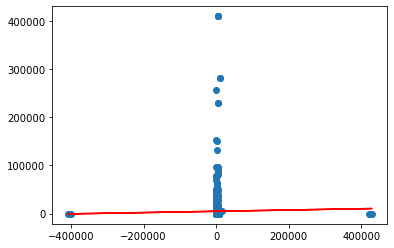

In [81]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [82]:
project_df3=project_df2[project_df2['Burn Length(h)']>0]

In [83]:
project_df3

,Active,Name,AcresBurned,Latitude,Longitude,Location,Counties,Started,Extinguished,Started Month,Burn Length,Burn Length(h)
0,False,Rim Fire,257314.0,37.857000,-120.086000,3 miles east of Groveland along Hwy 120,Tuolumne,2013-08-17 15:25:00+00:00,2013-09-06 18:30:00+00:00,8,20 days 03:05:00,483.083333
1,False,Powerhouse Fire,30274.0,34.585595,-118.423176,Angeles National Forest,Los Angeles,2013-05-30 15:28:00+00:00,2013-06-08 18:30:00+00:00,5,9 days 03:02:00,219.033333
2,False,Mountain Fire,27531.0,33.709500,-116.728850,Hwy 243 & Hwy 74 near Mountain Center,Riverside,2013-07-15 13:43:00+00:00,2013-07-30 18:00:00+00:00,7,15 days 04:17:00,364.283333
3,False,American Fire,27440.0,39.120000,-120.650000,"Deadwood Ridge, northeast of Foresthill",Placer,2013-08-10 16:30:00+00:00,2013-08-30 08:00:00+00:00,8,19 days 15:30:00,471.500000
4,False,Springs Fire,24251.0,0.000000,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,Ventura,2013-05-02 07:01:00+00:00,2013-05-11 06:30:00+00:00,5,8 days 23:29:00,215.483333
...,...,...,...,...,...,...,...,...,...,...,...,...
1627,False,Bailey Fire,10.0,33.496633,-116.631106,Bailey Road and Terwilliger Road in Anza,Riverside,2019-09-10 10:43:58+00:00,2019-09-10 10:45:00+00:00,9,0 days 00:01:02,0.017222
1629,False,IronGate Fire,10.0,41.946220,-122.401570,"Deer Run Road, east of Iron Gate Reservoir",Siskiyou,2019-06-16 20:33:00+00:00,2019-06-21 14:23:00+00:00,6,4 days 17:50:00,113.833333
1630,False,Cana Fire,10.0,39.839580,-121.957000,"Off Hamilton Nord Cana Hwy & Cana Hwy, northea...",Butte,2019-04-30 12:20:00+00:00,2019-05-08 08:47:00+00:00,4,7 days 20:27:00,188.450000
1631,False,Eagle Fire,9.0,33.827979,-117.499619,"Eagle Canyon Rd. and Cajalco Rd., southwest of...",Riverside,2019-10-10 12:08:00+00:00,2019-10-10 18:11:00+00:00,10,0 days 06:03:00,6.050000


In [84]:
project_df4=project_df3[project_df3['Burn Length(h)']<20000].copy()

In [85]:
Y = project_df4['AcresBurned'].values.reshape(-1,1)
X = project_df4['Burn Length(h)'].values.reshape(-1,1)

In [86]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)

LinearRegression()

In [87]:
Y_pred = linear_regressor.predict(X)

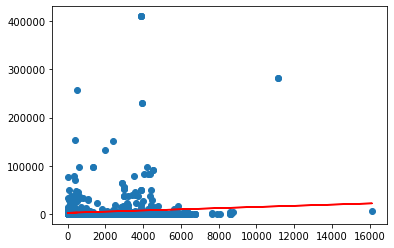

In [88]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [89]:
project_df5=project_df4.drop_duplicates(subset=['Name'], keep='first')

In [90]:
project_df5

,Active,Name,AcresBurned,Latitude,Longitude,Location,Counties,Started,Extinguished,Started Month,Burn Length,Burn Length(h)
0,False,Rim Fire,257314.0,37.857000,-120.086000,3 miles east of Groveland along Hwy 120,Tuolumne,2013-08-17 15:25:00+00:00,2013-09-06 18:30:00+00:00,8,20 days 03:05:00,483.083333
1,False,Powerhouse Fire,30274.0,34.585595,-118.423176,Angeles National Forest,Los Angeles,2013-05-30 15:28:00+00:00,2013-06-08 18:30:00+00:00,5,9 days 03:02:00,219.033333
2,False,Mountain Fire,27531.0,33.709500,-116.728850,Hwy 243 & Hwy 74 near Mountain Center,Riverside,2013-07-15 13:43:00+00:00,2013-07-30 18:00:00+00:00,7,15 days 04:17:00,364.283333
3,False,American Fire,27440.0,39.120000,-120.650000,"Deadwood Ridge, northeast of Foresthill",Placer,2013-08-10 16:30:00+00:00,2013-08-30 08:00:00+00:00,8,19 days 15:30:00,471.500000
4,False,Springs Fire,24251.0,0.000000,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,Ventura,2013-05-02 07:01:00+00:00,2013-05-11 06:30:00+00:00,5,8 days 23:29:00,215.483333
...,...,...,...,...,...,...,...,...,...,...,...,...
1620,False,Beaumont Fire,11.0,34.033117,-117.215450,Beaumont and San Timorese Canyon,San Bernardino,2019-10-21 08:16:33+00:00,2019-10-22 13:30:00+00:00,10,1 days 05:13:27,29.224167
1624,False,Fairmont Fire,10.0,32.762706,-117.097441,"Off Fairmont Avenue and Aldine Drive, Northwes...",San Diego,2019-10-15 17:41:57+00:00,2019-10-16 13:50:00+00:00,10,0 days 20:08:03,20.134167
1626,False,Electra Fire,10.0,38.332083,-120.671310,"Electra Road and Highway 49, east of Jackson",Amador,2019-09-25 13:13:41+00:00,2019-09-25 17:00:00+00:00,9,0 days 03:46:19,3.771944
1629,False,IronGate Fire,10.0,41.946220,-122.401570,"Deer Run Road, east of Iron Gate Reservoir",Siskiyou,2019-06-16 20:33:00+00:00,2019-06-21 14:23:00+00:00,6,4 days 17:50:00,113.833333


In [91]:
project_df5.to_csv(r'./ETL_clean.csv')

In [92]:
project_df5

,Active,Name,AcresBurned,Latitude,Longitude,Location,Counties,Started,Extinguished,Started Month,Burn Length,Burn Length(h)
0,False,Rim Fire,257314.0,37.857000,-120.086000,3 miles east of Groveland along Hwy 120,Tuolumne,2013-08-17 15:25:00+00:00,2013-09-06 18:30:00+00:00,8,20 days 03:05:00,483.083333
1,False,Powerhouse Fire,30274.0,34.585595,-118.423176,Angeles National Forest,Los Angeles,2013-05-30 15:28:00+00:00,2013-06-08 18:30:00+00:00,5,9 days 03:02:00,219.033333
2,False,Mountain Fire,27531.0,33.709500,-116.728850,Hwy 243 & Hwy 74 near Mountain Center,Riverside,2013-07-15 13:43:00+00:00,2013-07-30 18:00:00+00:00,7,15 days 04:17:00,364.283333
3,False,American Fire,27440.0,39.120000,-120.650000,"Deadwood Ridge, northeast of Foresthill",Placer,2013-08-10 16:30:00+00:00,2013-08-30 08:00:00+00:00,8,19 days 15:30:00,471.500000
4,False,Springs Fire,24251.0,0.000000,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,Ventura,2013-05-02 07:01:00+00:00,2013-05-11 06:30:00+00:00,5,8 days 23:29:00,215.483333
...,...,...,...,...,...,...,...,...,...,...,...,...
1620,False,Beaumont Fire,11.0,34.033117,-117.215450,Beaumont and San Timorese Canyon,San Bernardino,2019-10-21 08:16:33+00:00,2019-10-22 13:30:00+00:00,10,1 days 05:13:27,29.224167
1624,False,Fairmont Fire,10.0,32.762706,-117.097441,"Off Fairmont Avenue and Aldine Drive, Northwes...",San Diego,2019-10-15 17:41:57+00:00,2019-10-16 13:50:00+00:00,10,0 days 20:08:03,20.134167
1626,False,Electra Fire,10.0,38.332083,-120.671310,"Electra Road and Highway 49, east of Jackson",Amador,2019-09-25 13:13:41+00:00,2019-09-25 17:00:00+00:00,9,0 days 03:46:19,3.771944
1629,False,IronGate Fire,10.0,41.946220,-122.401570,"Deer Run Road, east of Iron Gate Reservoir",Siskiyou,2019-06-16 20:33:00+00:00,2019-06-21 14:23:00+00:00,6,4 days 17:50:00,113.833333


In [93]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data


In [94]:
Y = project_df5['AcresBurned'].values.reshape(-1,1)
X = project_df5['Burn Length(h)'].values.reshape(-1,1)

In [95]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)

LinearRegression()

In [96]:
Y_pred = linear_regressor.predict(X)

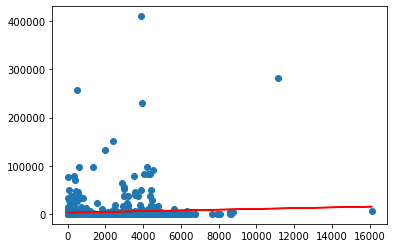

In [97]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [98]:
start = pd.DatetimeIndex(project_df5['Started']);
project_df5['Started Year'] = start.year
project_df5

C:\Users\msmas\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Active,Name,AcresBurned,Latitude,Longitude,Location,Counties,Started,Extinguished,Started Month,Burn Length,Burn Length(h),Started Year
0,False,Rim Fire,257314.0,37.857000,-120.086000,3 miles east of Groveland along Hwy 120,Tuolumne,2013-08-17 15:25:00+00:00,2013-09-06 18:30:00+00:00,8,20 days 03:05:00,483.083333,2013
1,False,Powerhouse Fire,30274.0,34.585595,-118.423176,Angeles National Forest,Los Angeles,2013-05-30 15:28:00+00:00,2013-06-08 18:30:00+00:00,5,9 days 03:02:00,219.033333,2013
2,False,Mountain Fire,27531.0,33.709500,-116.728850,Hwy 243 & Hwy 74 near Mountain Center,Riverside,2013-07-15 13:43:00+00:00,2013-07-30 18:00:00+00:00,7,15 days 04:17:00,364.283333,2013
3,False,American Fire,27440.0,39.120000,-120.650000,"Deadwood Ridge, northeast of Foresthill",Placer,2013-08-10 16:30:00+00:00,2013-08-30 08:00:00+00:00,8,19 days 15:30:00,471.500000,2013
4,False,Springs Fire,24251.0,0.000000,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,Ventura,2013-05-02 07:01:00+00:00,2013-05-11 06:30:00+00:00,5,8 days 23:29:00,215.483333,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,False,Beaumont Fire,11.0,34.033117,-117.215450,Beaumont and San Timorese Canyon,San Bernardino,2019-10-21 08:16:33+00:00,2019-10-22 13:30:00+00:00,10,1 days 05:13:27,29.224167,2019
1624,False,Fairmont Fire,10.0,32.762706,-117.097441,"Off Fairmont Avenue and Aldine Drive, Northwes...",San Diego,2019-10-15 17:41:57+00:00,2019-10-16 13:50:00+00:00,10,0 days 20:08:03,20.134167,2019
1626,False,Electra Fire,10.0,38.332083,-120.671310,"Electra Road and Highway 49, east of Jackson",Amador,2019-09-25 13:13:41+00:00,2019-09-25 17:00:00+00:00,9,0 days 03:46:19,3.771944,2019
1629,False,IronGate Fire,10.0,41.946220,-122.401570,"Deer Run Road, east of Iron Gate Reservoir",Siskiyou,2019-06-16 20:33:00+00:00,2019-06-21 14:23:00+00:00,6,4 days 17:50:00,113.833333,2019


In [99]:
#Drop "Active" Column

projectheat_df = project_df5.drop(columns = 'Active')
projectheat_df.head()

,Name,AcresBurned,Latitude,Longitude,Location,Counties,Started,Extinguished,Started Month,Burn Length,Burn Length(h),Started Year
0,Rim Fire,257314.0,37.857000,-120.086000,3 miles east of Groveland along Hwy 120,Tuolumne,2013-08-17 15:25:00+00:00,2013-09-06 18:30:00+00:00,8,20 days 03:05:00,483.083333,2013
1,Powerhouse Fire,30274.0,34.585595,-118.423176,Angeles National Forest,Los Angeles,2013-05-30 15:28:00+00:00,2013-06-08 18:30:00+00:00,5,9 days 03:02:00,219.033333,2013
2,Mountain Fire,27531.0,33.709500,-116.728850,Hwy 243 & Hwy 74 near Mountain Center,Riverside,2013-07-15 13:43:00+00:00,2013-07-30 18:00:00+00:00,7,15 days 04:17:00,364.283333,2013
3,American Fire,27440.0,39.120000,-120.650000,"Deadwood Ridge, northeast of Foresthill",Placer,2013-08-10 16:30:00+00:00,2013-08-30 08:00:00+00:00,8,19 days 15:30:00,471.500000,2013
4,Springs Fire,24251.0,0.000000,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,Ventura,2013-05-02 07:01:00+00:00,2013-05-11 06:30:00+00:00,5,8 days 23:29:00,215.483333,2013


<AxesSubplot:>

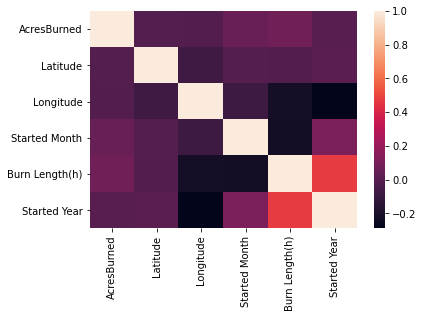

In [100]:
#Visualize correlation matrices using Seaborn; Exploratory Data Analysis Process 
#Used to decide which feature affect the target vairbale the most and should, in turn, get used in predicitng this target variable; used method for feature selection in vachine learning

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.heatmap(projectheat_df.corr())

<AxesSubplot:>

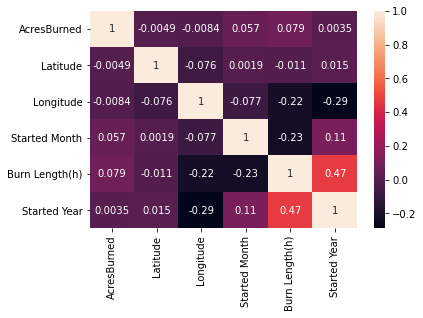

In [101]:
#Creat Seaborn heatmap for correlation matrix
#Add correlation numbers
#One important thing to note when plotting a correlation matrix is that it completely ignores any non-numeric column.(All categorical variables were NOT changed to numberic variables)

sns.heatmap(projectheat_df.corr(), annot = True)

<AxesSubplot:>

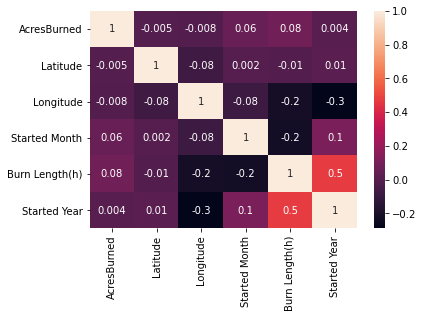

In [102]:
#Reduce number displayed and improve readibility 

sns.heatmap(projectheat_df.corr(), annot = True, fmt='.1g')

<AxesSubplot:>

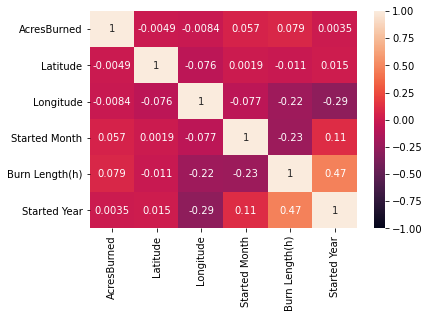

In [103]:
#Change Color

sns.heatmap(projectheat_df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'rocket')

<AxesSubplot:>

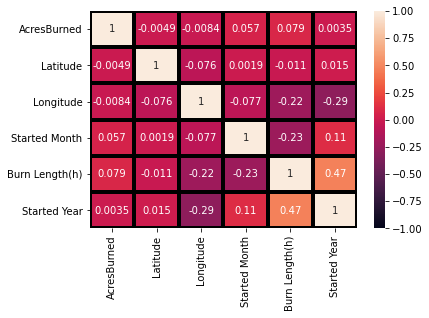

In [104]:
#Add thinkness and color border

sns.heatmap(projectheat_df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'rocket', linewidths=3, linecolor='black')


In [158]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data

In [159]:
Y_cor = project_df5['Started Year']
X_cor = project_df5['Burn Length(h)']
Y = project_df5['Started Year'].values.reshape(-1,1)
X = project_df5['Burn Length(h)'].values.reshape(-1,1)


In [160]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)

LinearRegression()

In [161]:
Y_pred = linear_regressor.predict(X)

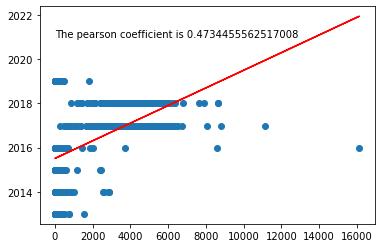

In [164]:
from scipy.stats import pearsonr

corr, _ = pearsonr(np.array(X_cor, dtype=float),np.array(Y_cor, dtype=float))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.text(0,2021,f"The pearson coefficient is {corr}")
plt.show()




In [112]:
groupedFireYear = project_df5.groupby(by=['Started Month'] ,as_index=False).agg({'AcresBurned': "sum",'Name':"count"})
mean = groupedFireYear[['AcresBurned']].mean()
groupedFireYear['BadMonth'] =groupedFireYear['AcresBurned'] >  mean.item()
groupedFireYear.head(10)

,Started Month,AcresBurned,Name,BadMonth
0,1,3626.0,7,False
1,2,8509.0,8,False
2,3,840.0,4,False
3,4,12915.0,25,False
4,5,137509.0,107,False
5,6,273655.0,206,False
6,7,2142414.0,292,True
7,8,1015020.0,206,True
8,9,290103.0,135,False
9,10,363375.0,94,False


In [113]:
groupedFireYear['NextBadMonth']=groupedFireYear['BadMonth'].shift(periods=-1)
groupedFireYear

,Started Month,AcresBurned,Name,BadMonth,NextBadMonth
0,1,3626.0,7,False,False
1,2,8509.0,8,False,False
2,3,840.0,4,False,False
3,4,12915.0,25,False,False
4,5,137509.0,107,False,False
5,6,273655.0,206,False,True
6,7,2142414.0,292,True,True
7,8,1015020.0,206,True,False
8,9,290103.0,135,False,False
9,10,363375.0,94,False,False


In [114]:
project_df2.head(2)

,Active,Name,AcresBurned,Latitude,Longitude,Location,Counties,Started,Extinguished,Started Month,Burn Length,Burn Length(h)
0,False,Rim Fire,257314.0,37.857000,-120.086000,3 miles east of Groveland along Hwy 120,Tuolumne,2013-08-17 15:25:00+00:00,2013-09-06 18:30:00+00:00,8,20 days 03:05:00,483.083333
1,False,Powerhouse Fire,30274.0,34.585595,-118.423176,Angeles National Forest,Los Angeles,2013-05-30 15:28:00+00:00,2013-06-08 18:30:00+00:00,5,9 days 03:02:00,219.033333


In [115]:
project_df2.columns

Index(['Active', 'Name', 'AcresBurned', 'Latitude', 'Longitude', 'Location',
       'Counties', 'Started', 'Extinguished', 'Started Month', 'Burn Length',
       'Burn Length(h)'],
      dtype='object')

In [116]:
df = project_df2[['Started Month','Counties']]
df.head()

,Started Month,Counties
0,8,Tuolumne
1,5,Los Angeles
2,7,Riverside
3,8,Placer
4,5,Ventura


In [117]:
#Logisitc Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np 

In [118]:
X = df.drop(columns='Counties')
y = df["Counties"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
county_logreg = LogisticRegression()
county_logreg.fit(X_train, y_train)

print('County fire prediction score: {:.2f}'.format(county_logreg.score(X_test, y_test)))

County fire prediction score: 0.05


C:\Users\msmas\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [119]:
X = df.drop(columns='Started Month')
y = df["Started Month"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
month_logreg = LogisticRegression()
month_logreg.fit(X_train, y_train)

print('Start Month prediction score: {:.2f}'.format(month_logreg.score(X_test, y_test)))

ValueError: could not convert string to float: 'Lake'

In [120]:
set(df.Counties.values)

{'Alameda',
 'Alpine',
 'Amador',
 'Butte',
 'Calaveras',
 'Colusa',
 'Contra Costa',
 'Del Norte',
 'El Dorado',
 'Fresno',
 'Glenn',
 'Humboldt',
 'Inyo',
 'Kern',
 'Kings',
 'Lake',
 'Lassen',
 'Los Angeles',
 'Madera',
 'Marin',
 'Mariposa',
 'Mendocino',
 'Merced',
 'Mexico',
 'Modoc',
 'Mono',
 'Monterey',
 'Napa',
 'Nevada',
 'Orange',
 'Placer',
 'Plumas',
 'Riverside',
 'Sacramento',
 'San Benito',
 'San Bernardino',
 'San Diego',
 'San Joaquin',
 'San Luis Obispo',
 'San Mateo',
 'Santa Barbara',
 'Santa Clara',
 'Santa Cruz',
 'Shasta',
 'Sierra',
 'Siskiyou',
 'Solano',
 'Sonoma',
 'Stanislaus',
 'State of Nevada',
 'State of Oregon',
 'Sutter',
 'Tehama',
 'Trinity',
 'Tulare',
 'Tuolumne',
 'Ventura',
 'Yolo',
 'Yuba'}

In [121]:
X

,Counties
0,Tuolumne
1,Los Angeles
2,Riverside
3,Placer
4,Ventura
...,...
1627,Riverside
1629,Siskiyou
1630,Butte
1631,Riverside


In [122]:
X[:1]

,Counties
0,Tuolumne


In [123]:
month_logreg.predict(X[:1])

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [124]:
# weather_df = pd.read_csv('WeatherEvents_Jan2016-Dec2020.csv')

In [125]:
# isCa = weather_df['State'] == 'CA'
# ca_weather_df = weather_df[isCa]

In [126]:
# ca_weather_df 

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
86134,W-86156,Fog,Moderate,2016-01-02 00:53:00,2016-01-02 01:53:00,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0
86135,W-86157,Rain,Light,2016-01-04 02:53:00,2016-01-04 05:53:00,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0
86136,W-86158,Rain,Light,2016-01-04 11:53:00,2016-01-04 17:53:00,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0
86137,W-86159,Rain,Light,2016-01-05 06:53:00,2016-01-05 12:48:00,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0
86138,W-86160,Rain,Moderate,2016-01-05 12:48:00,2016-01-05 13:50:00,US/Pacific,KWVI,36.9394,-121.7900,Freedom,Santa Cruz,CA,95019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259341,W-6261282,Precipitation,UNK,2020-05-30 16:55:00,2020-05-30 17:15:00,US/Pacific,KO87,40.0167,-124.0667,Whitethorn,Humboldt,CA,95589.0
6259342,W-6261283,Cold,Severe,2020-08-21 23:35:00,2020-08-22 00:55:00,US/Pacific,KO87,40.0167,-124.0667,Whitethorn,Humboldt,CA,95589.0
6259343,W-6261284,Precipitation,UNK,2020-11-13 16:55:00,2020-11-13 17:15:00,US/Pacific,KO87,40.0167,-124.0667,Whitethorn,Humboldt,CA,95589.0
6259344,W-6261285,Precipitation,UNK,2020-12-17 00:35:00,2020-12-17 01:15:00,US/Pacific,KO87,40.0167,-124.0667,Whitethorn,Humboldt,CA,95589.0


In [127]:
# import datetime as dt
# import warnings
# # Too lazy/busy to fix warnings, I know :(
# warnings.filterwarnings('ignore')
# warnings.simplefilter('ignore')

# #Aggregate and group weather data data
# start = pd.DatetimeIndex(ca_weather_df['StartTime(UTC)']);
# end = pd.DatetimeIndex(ca_weather_df['EndTime(UTC)']);
# ca_weather_df ['Mean_Duration'] = (end-start).total_seconds()
# ca_weather_df ['Year'] = start.year
# ca_weather_df ['Month'] = start.month
# grouped = ca_weather_df.groupby(by=['Year','Month','Type','Severity'] ,as_index=False).agg({'Mean_Duration': "mean", 'EventId': "count"})
# grouped['Count'] = grouped.EventId
# ca_weather_dfGrouped = grouped[['Year','Month','Type','Count']]
# ca_weather_dfGrouped.head(12)

,Year,Month,Type,Count
0,2016,1,Cold,179
1,2016,1,Fog,887
2,2016,1,Fog,2170
3,2016,1,Precipitation,135
4,2016,1,Rain,126
5,2016,1,Rain,4428
6,2016,1,Rain,1037
7,2016,1,Snow,88
8,2016,1,Snow,367
9,2016,1,Snow,166


In [128]:
# precip_weather_df=ca_weather_dfGrouped['Type'] == 'Rain'

In [129]:
# precip_weather_df2=ca_weather_dfGrouped[precip_weather_df]

In [130]:
# precip_weather_df2

,Year,Month,Type,Count
4,2016,1,Rain,126
5,2016,1,Rain,4428
6,2016,1,Rain,1037
15,2016,2,Rain,15
16,2016,2,Rain,912
...,...,...,...,...
594,2020,11,Rain,846
595,2020,11,Rain,107
604,2020,12,Rain,24
605,2020,12,Rain,1751


In [ ]:
# precip_weather_df2